# Setup

# 0. Preparation

In this part, you will use a dataset related to COVID-19. Load your dataset using pandas.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
covid_data = pd.read_csv('Covid Dataset.csv')
categorical_feature_mask = covid_data.dtypes == object
cateforical_cols = covid_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
covid_data[cateforical_cols] = covid_data[cateforical_cols].apply(lambda col: le.fit_transform(col))
covid_data = covid_data.astype(float)

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)

---------------

# 1. DNN as nonlinear dimensionality reduction method (50 Points)

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html).
(It would be ok to use PyTorch as well.)
Reduce the dimension of the data to 2 dimensions and visualize the low-dimensional data.

In [2]:
# import necessary libraries
import keras
from keras import backend as K
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers
import numpy as np

In [3]:
# define layers (25 Points)
#x -> 3803, 20
#y -> 3803,
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

original_dim = 20
intermediate_dim = 10
latent_dim = 1

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)
z = layers.Lambda(sampling)([z_mean, z_log_sigma])
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# VAE
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [4]:
# train the model and reduce the dimension of the data (15 Points)
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.fit(X_train, X_train,
        epochs=100,
        batch_size=20,
        validation_data=(X_test, X_test))

Epoch 1/100
191/191 [==============================] - 5s 10ms/step - loss: 13.3058 - val_loss: 12.5401
Epoch 2/100
191/191 [==============================] - 1s 7ms/step - loss: 12.1413 - val_loss: 11.8370
Epoch 3/100
191/191 [==============================] - 1s 6ms/step - loss: 11.6105 - val_loss: 11.3883
Epoch 4/100
191/191 [==============================] - 1s 7ms/step - loss: 11.2491 - val_loss: 11.1375
Epoch 5/100
191/191 [==============================] - 1s 6ms/step - loss: 11.0556 - val_loss: 11.0130
Epoch 6/100
191/191 [==============================] - 2s 10ms/step - loss: 10.9692 - val_loss: 10.9598
Epoch 7/100
191/191 [==============================] - 1s 8ms/step - loss: 10.9117 - val_loss: 10.9179
Epoch 8/100
191/191 [==============================] - 1s 5ms/step - loss: 10.8857 - val_loss: 10.8946
Epoch 9/100
191/191 [==============================] - 1s 7ms/step - loss: 10.8566 - val_loss: 10.8782
Epoch 10/100
191/191 [==============================] - 2s 8ms/step - l

Epoch 80/100
191/191 [==============================] - 1s 6ms/step - loss: 10.4859 - val_loss: 10.5222
Epoch 81/100
191/191 [==============================] - 1s 7ms/step - loss: 10.4791 - val_loss: 10.5100
Epoch 82/100
191/191 [==============================] - 1s 6ms/step - loss: 10.4721 - val_loss: 10.5124
Epoch 83/100
191/191 [==============================] - 1s 7ms/step - loss: 10.4596 - val_loss: 10.5076
Epoch 84/100
191/191 [==============================] - 2s 8ms/step - loss: 10.4783 - val_loss: 10.5047
Epoch 85/100
191/191 [==============================] - 1s 6ms/step - loss: 10.4726 - val_loss: 10.5009
Epoch 86/100
191/191 [==============================] - 2s 9ms/step - loss: 10.4669 - val_loss: 10.5005
Epoch 87/100
191/191 [==============================] - 1s 7ms/step - loss: 10.4648 - val_loss: 10.4916
Epoch 88/100
191/191 [==============================] - 2s 8ms/step - loss: 10.4590 - val_loss: 10.4958
Epoch 89/100
191/191 [==============================] - 2s 9ms/s

51/51 [==============================] - 0s 2ms/step


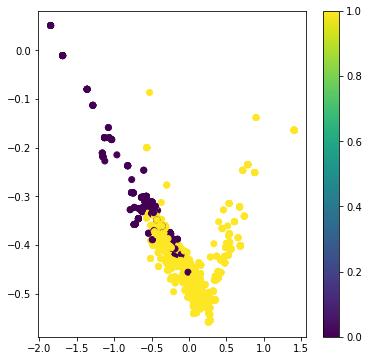

In [5]:
# Plot the encoded data (10 Points)
arr = encoder.predict(X_test, batch_size=32)
x_test_encoded = np.array(arr)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1], c = y_test)
plt.colorbar()
plt.show()